In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

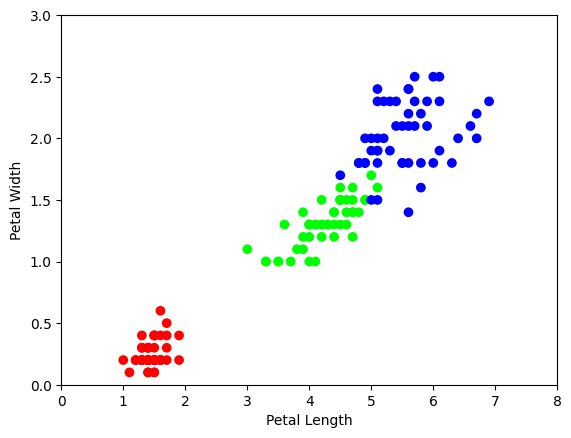

In [9]:
def plot_dataset(X, y):
    COLORS = np.array(["#ff0000", "#00ff00", "#0000ff"])
    petal_length = X[:,0]
    petal_width= X[:,1]
    plt.scatter(petal_length, petal_width, c=COLORS[y])
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.axis([0, 8, 0, 3])
plot_dataset(X, y)
plt.show()

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [5]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [6]:
!dot -Tpng iris_tree.dot -o iris_tree.png

![Alt text](iris_tree.png)

In [7]:
def plot_decision_boundaries(clf, X, y):
    X1_mesh = np.linspace(0, 8, 1000)
    X2_mesh = np.linspace(0, 3, 1000)
    X1, X2 = np.meshgrid(X1_mesh, X2_mesh)
    y_pred = clf.predict(np.c_[X1.ravel(), X2.ravel()])
    Z = y_pred.reshape(X1.shape)
    colors = ListedColormap(["#ff0000","#00ff00","#0000ff"])
    plt.contourf(X1, X2, Z, alpha=0.3, cmap=colors)

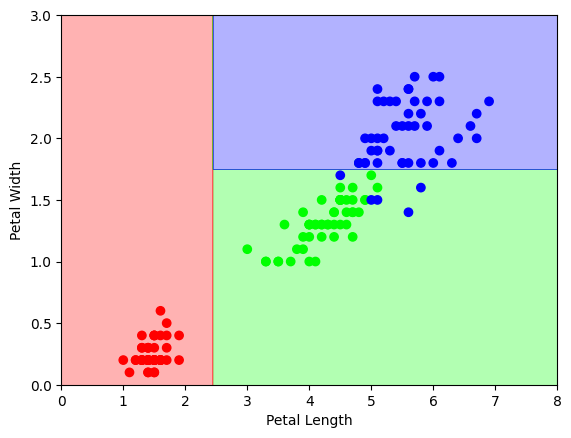

In [10]:
plot_decision_boundaries(tree_clf, X, y)
plot_dataset(X, y)
plt.show()